In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [70]:
df = pd.read_csv('Bankruptcy Prediction.csv')


In [71]:
# Check for missing values
print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [72]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [73]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [74]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [75]:
# Display basic statistics
descriptive_stats = df.describe()
descriptive_stats

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

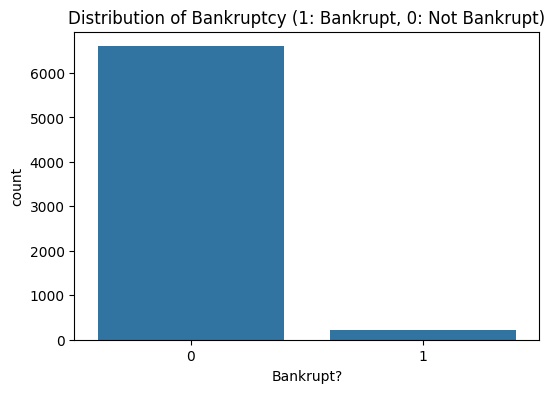

In [76]:
# Visualize the target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Bankruptcy (1: Bankrupt, 0: Not Bankrupt)')
plt.show()

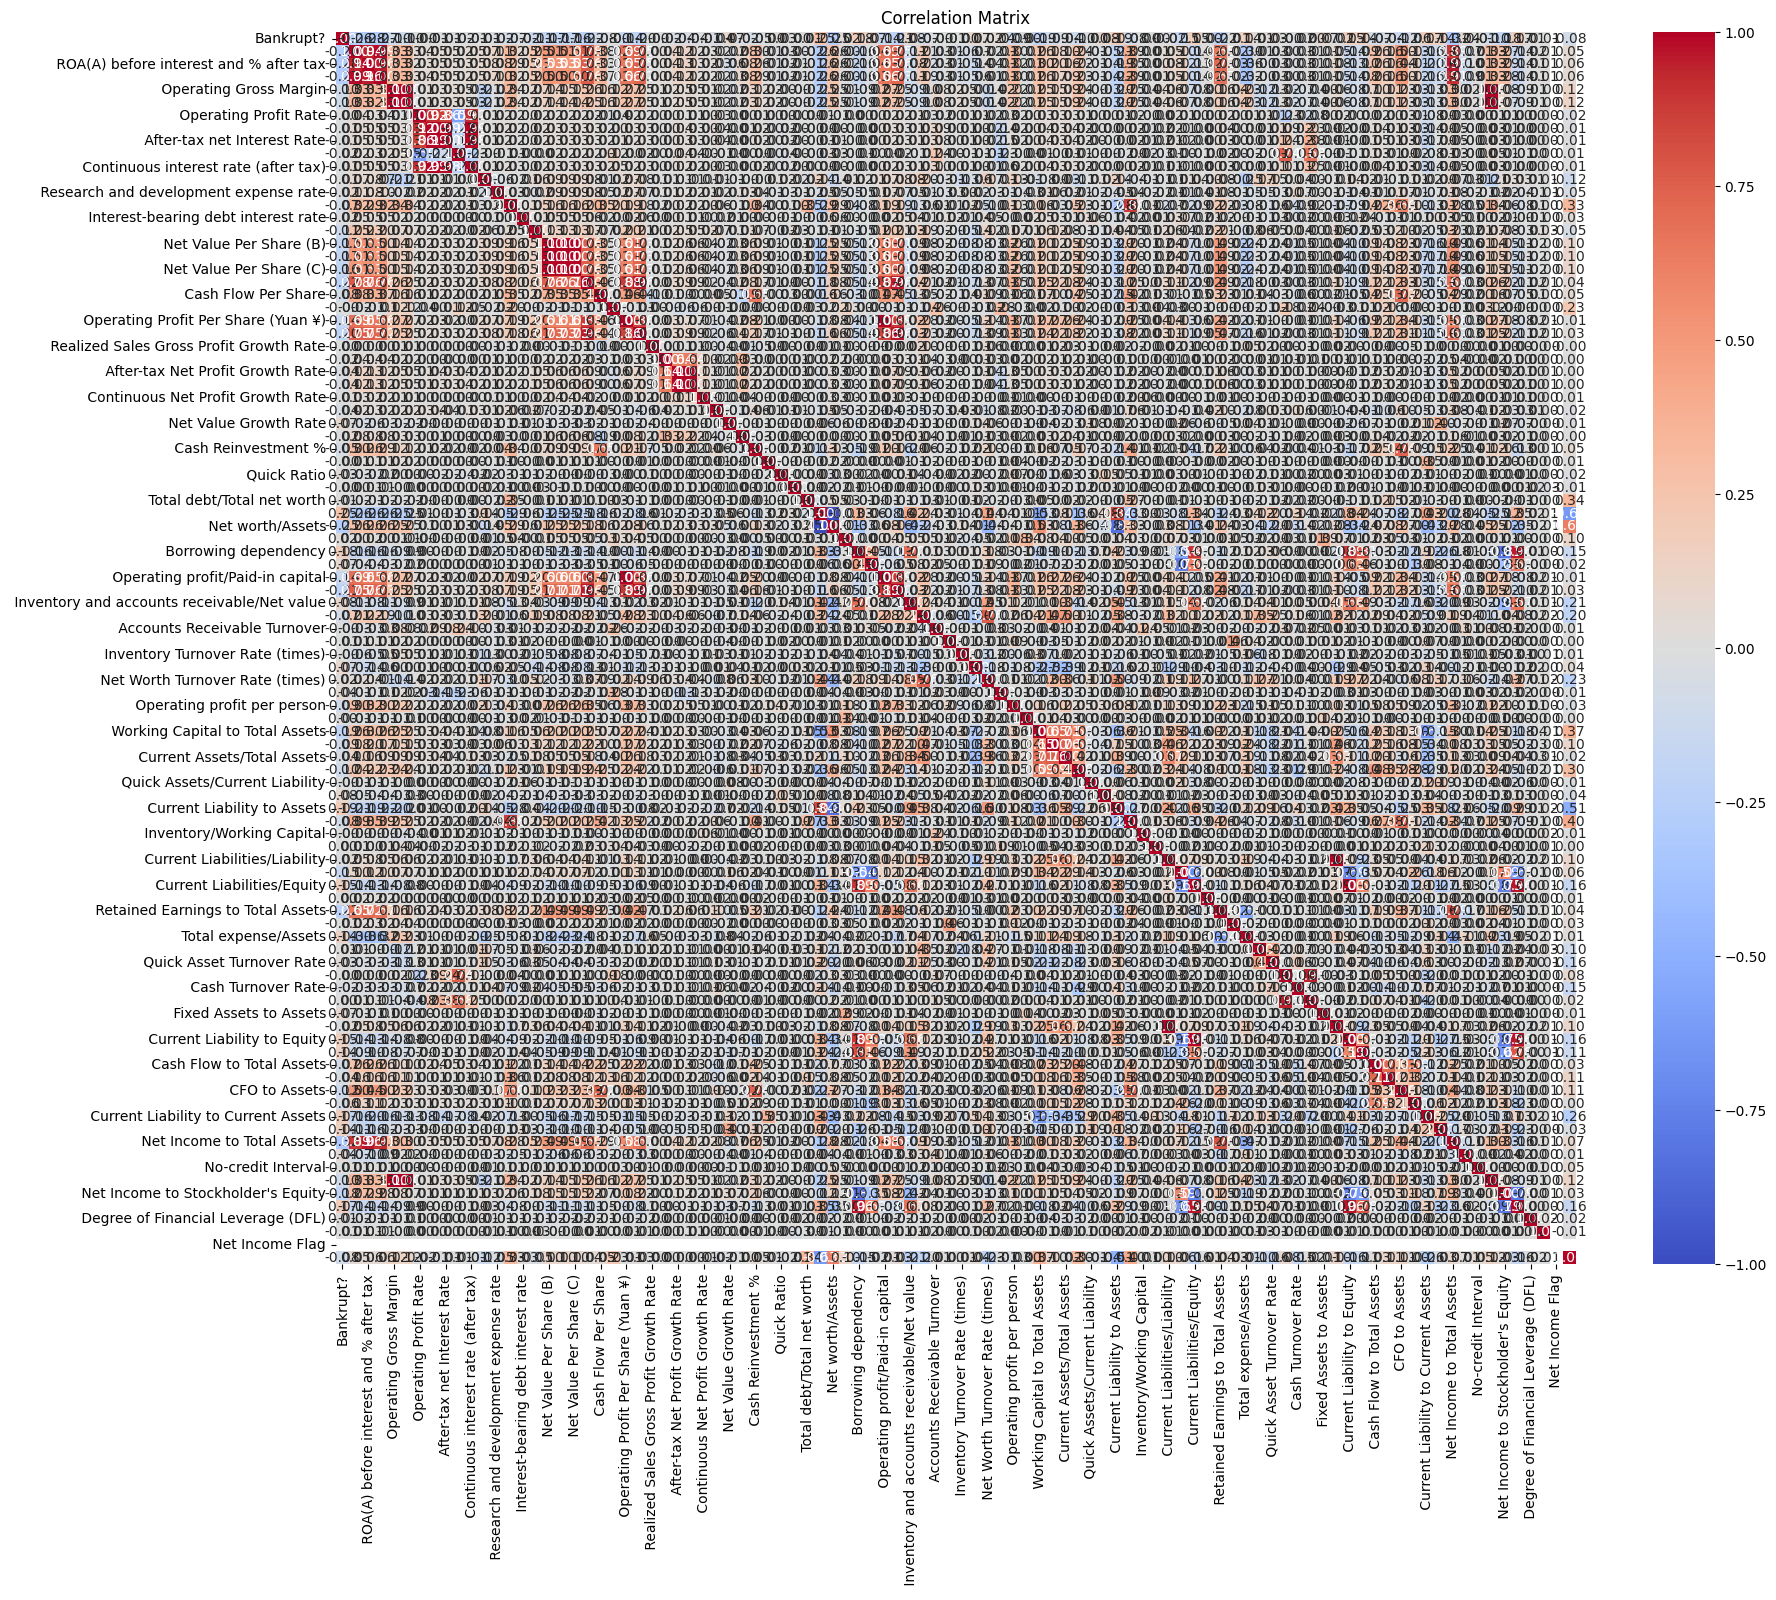

In [58]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Feature Scaling


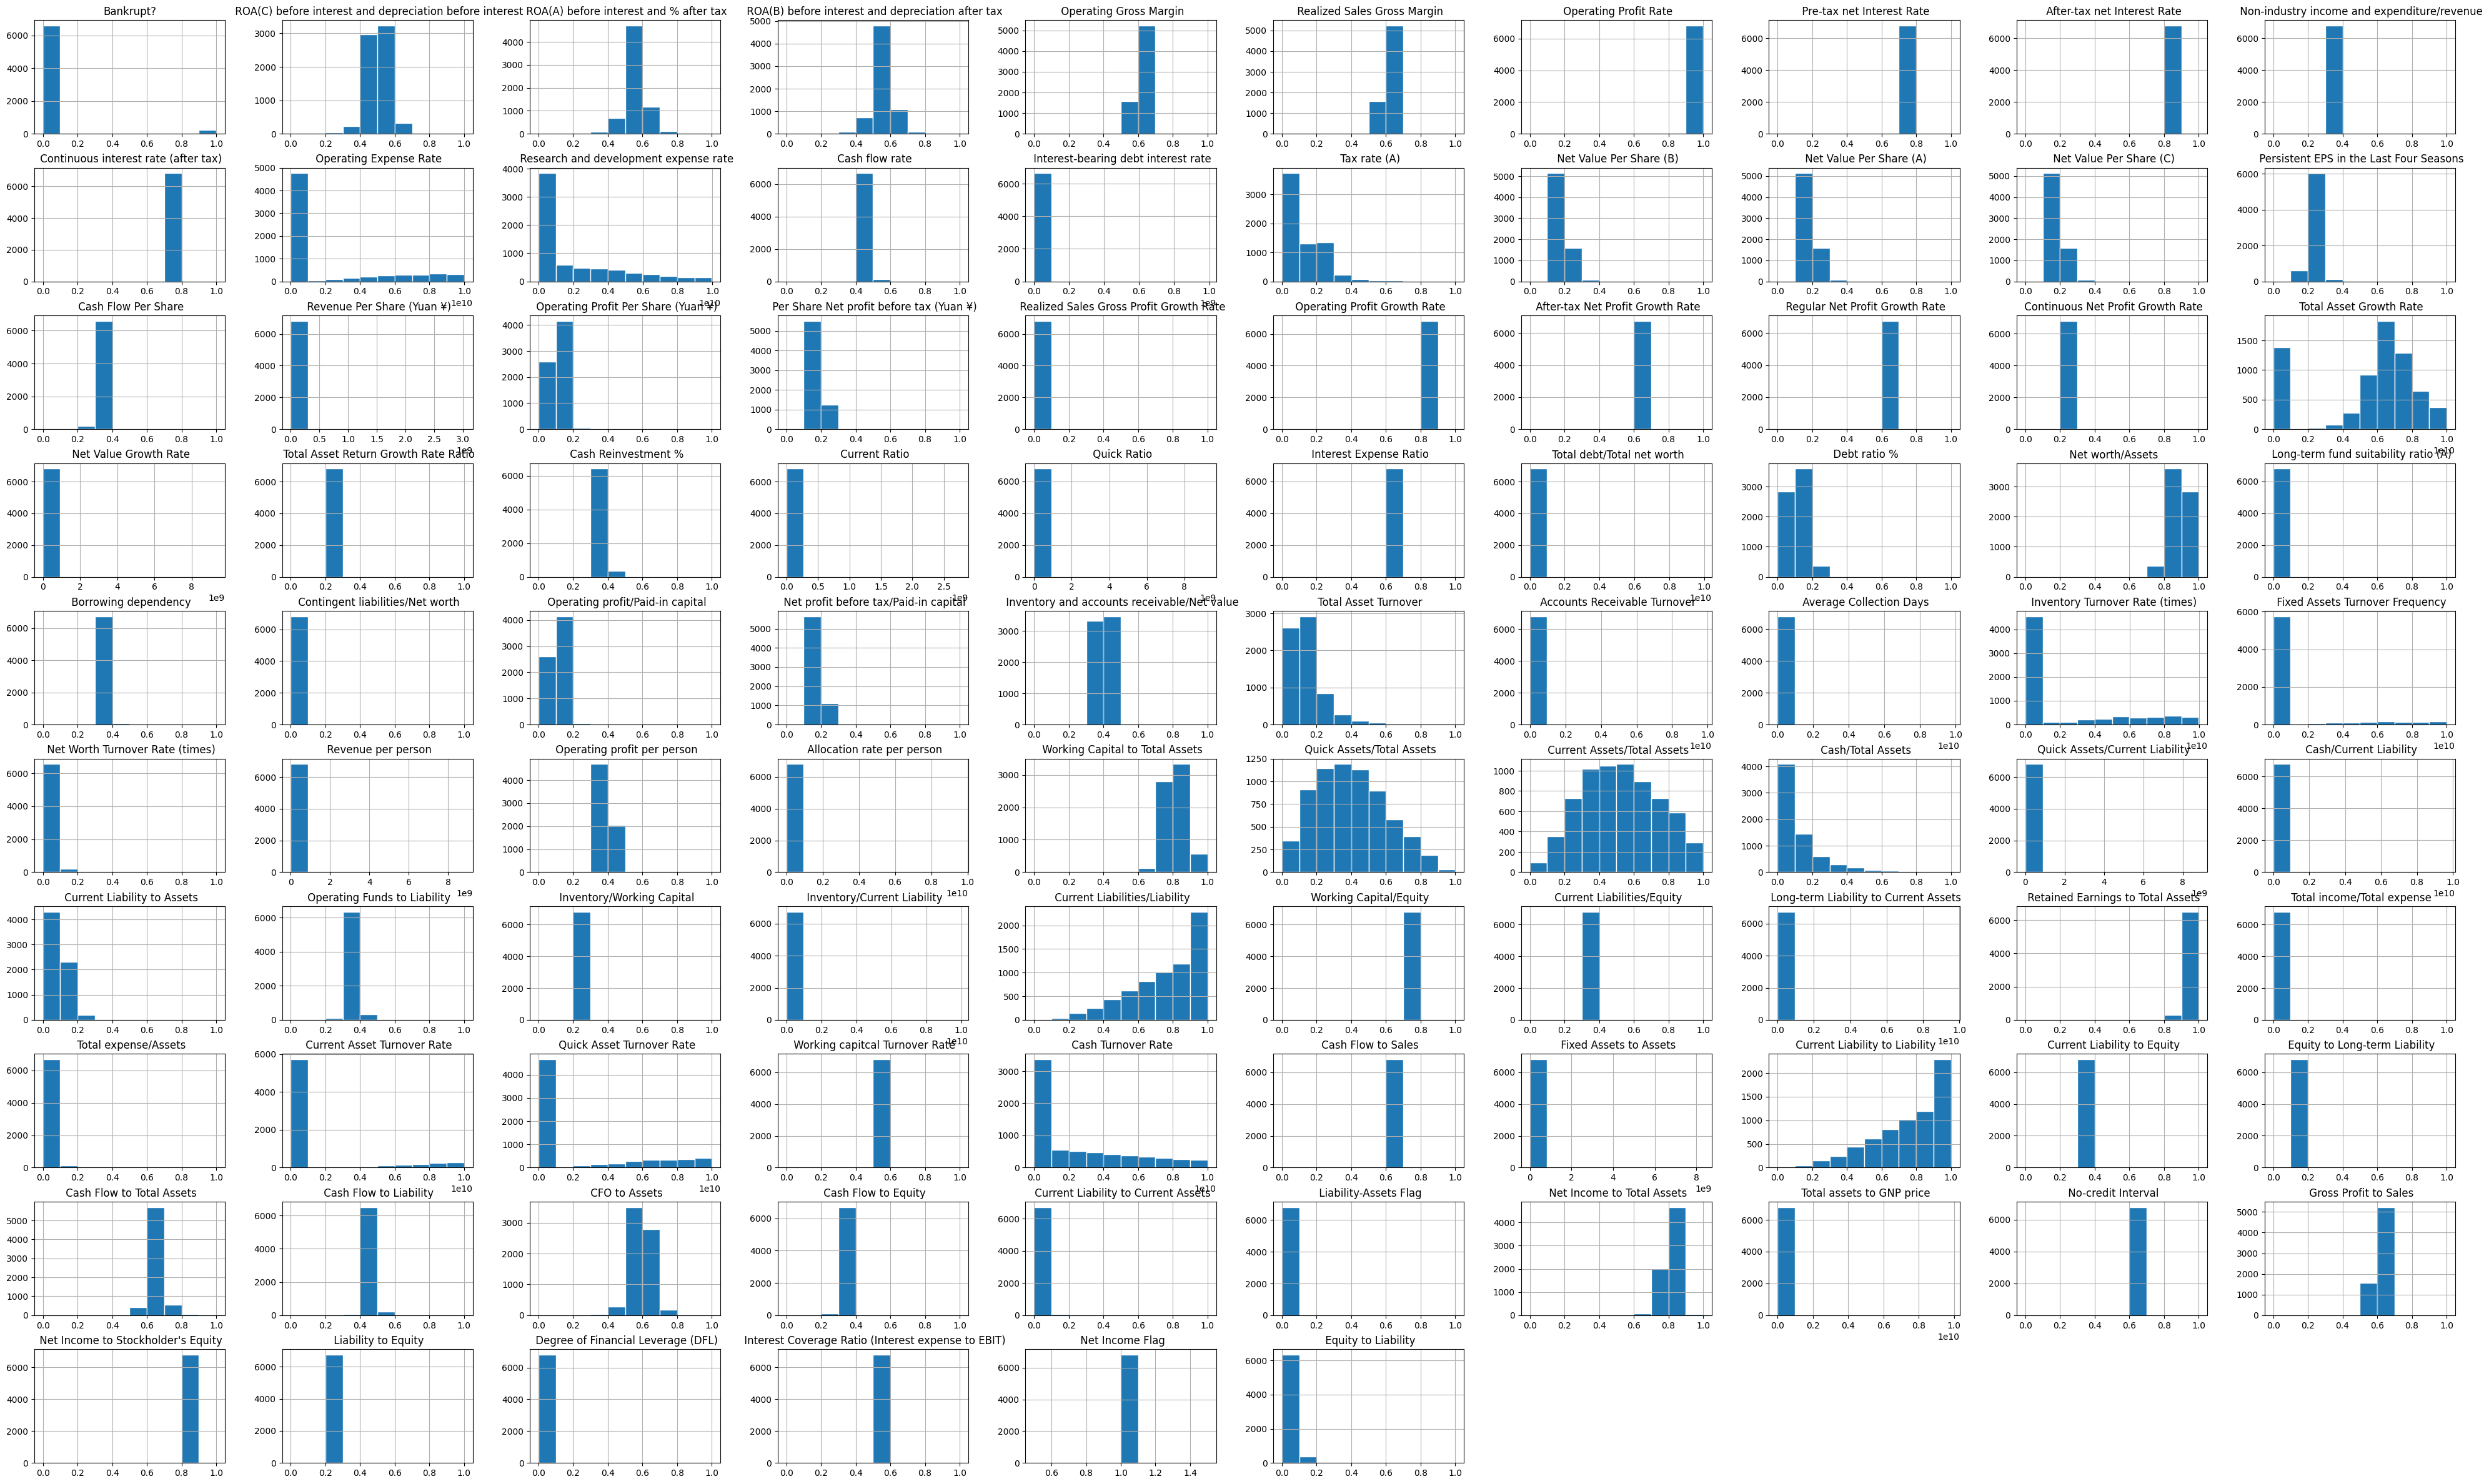

In [61]:
# Import the required libraries
import matplotlib.pyplot as plt

# Create a histogram for the DataFrame 'bank'
df.hist(figsize=(50, 30), edgecolor='white')

# Display the histogram
plt.show()

In [79]:
# Split the data into features (X) and target variable (y)
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Model 1: Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [84]:
# Model 3: Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [85]:
# Model Validation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, class_report

In [86]:
# Evaluate Logistic Regression model
logreg_accuracy, logreg_conf_matrix, logreg_class_report = evaluate_model(logreg_model, X_test_scaled, y_test)

In [87]:
# Evaluate Random Forest model
rf_accuracy, rf_conf_matrix, rf_class_report = evaluate_model(rf_model, X_test_scaled, y_test)

In [88]:
# Evaluate SVM model
svm_accuracy, svm_conf_matrix, svm_class_report = evaluate_model(svm_model, X_test_scaled, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# Display model evaluation results
print("Model 1: Logistic Regression")
print(f"Accuracy: {logreg_accuracy}")
print("Confusion Matrix:")
print(logreg_conf_matrix)
print("Classification Report:")
print(logreg_class_report)


Model 1: Logistic Regression
Accuracy: 0.9655425219941349
Confusion Matrix:
[[1306    7]
 [  40   11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.61      0.22      0.32        51

    accuracy                           0.97      1364
   macro avg       0.79      0.61      0.65      1364
weighted avg       0.96      0.97      0.96      1364



In [91]:
print("\nModel 2: Random Forest")
print(f"Accuracy: {rf_accuracy}")
print("Confusion Matrix:")
print(rf_conf_matrix)
print("Classification Report:")
print(rf_class_report)




Model 2: Random Forest
Accuracy: 0.966275659824047
Confusion Matrix:
[[1310    3]
 [  43    8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.73      0.16      0.26        51

    accuracy                           0.97      1364
   macro avg       0.85      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364



In [92]:
print("\nModel 3: Support Vector Machine (SVM)")
print(f"Accuracy: {svm_accuracy}")
print("Confusion Matrix:")
print(svm_conf_matrix)
print("Classification Report:")
print(svm_class_report)


Model 3: Support Vector Machine (SVM)
Accuracy: 0.9626099706744868
Confusion Matrix:
[[1313    0]
 [  51    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



In [94]:
# Save the trained model
import pickle
with open("trained_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)